In [130]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:/luzheng/桌面/用户行为/基于点击流用户行为分析素材/student_data_fufei.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
def toint(x):
    week = {'周一': 1, '周二': 2,
            '周三': 3, '周四': 4,
            '周五': 5, '周六': 6,
            '周日': 7}
    return week[x]
df['week_max'] = df['week_max'].apply(toint)
df['aaaa'] = df['week_max']
df

,uid,first_system,first_browser,week_max,hour_max,buy_type,mean_rate,total,aaaa
0,10180880,Windows,Chrome,5,0,0,0.067996,0.203989,5
1,10180882,Android,Chrome Mobile,5,0,0,0.046782,0.421040,5
2,10180884,Android,Android,5,0,0,0.030622,0.091867,5
3,10180887,Windows,Chrome,5,0,0,0.028511,0.085534,5
4,10180890,Windows,Chrome,2,0,0,0.073508,0.441050,2
5,10180891,Android,Chrome Mobile,5,0,0,0.030278,0.060556,5
6,10180894,Android,Chrome Mobile,5,0,0,0.027859,0.167153,5
7,10180901,iOS,Mobile Safari,5,0,0,0.030278,0.060556,5
8,10180909,Windows,Chrome,1,13,0,0.057790,0.231158,1
9,10180912,Android,Chrome Mobile,5,0,0,0.030278,0.060556,5


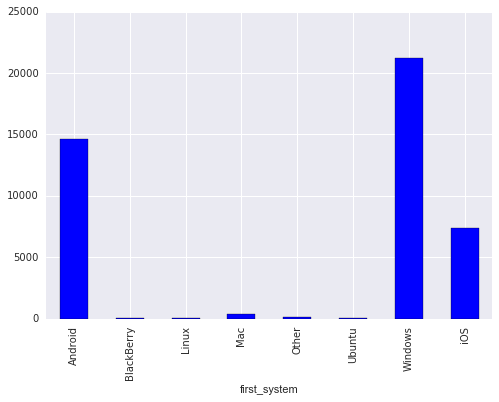

In [89]:
count = df.groupby(['first_system']).size()
count.plot(kind='bar')

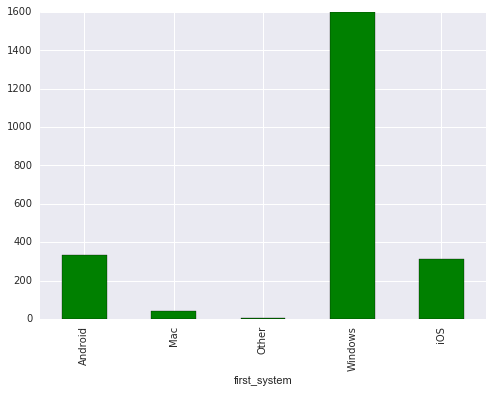

In [90]:
df_buy = df.ix[df.buy_type == 1]
count = df_buy.groupby(['first_system']).size()
count.plot(kind='bar', color='green')

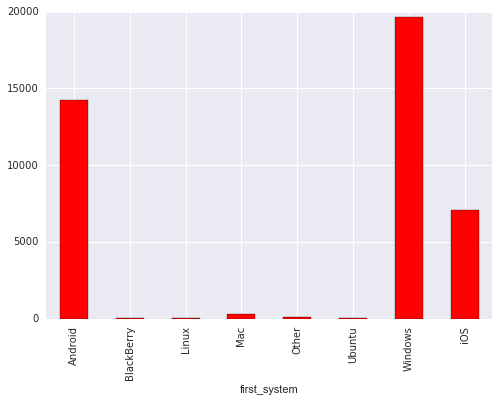

In [88]:
df_free = df.ix[df.buy_type == 0]
count = df_free.groupby(['first_system']).size()
count.plot(kind='bar', color='red')

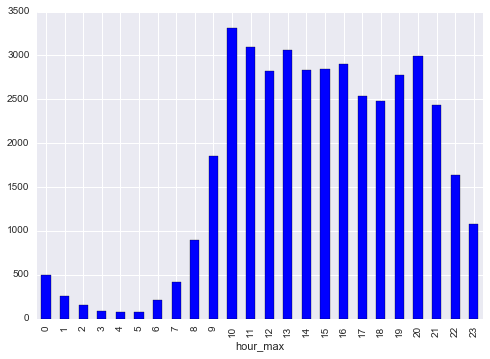

In [131]:
df_free = df.ix[df.buy_type == 0]
count = df_free.groupby(['hour_max']).size()
count.plot(kind='bar')

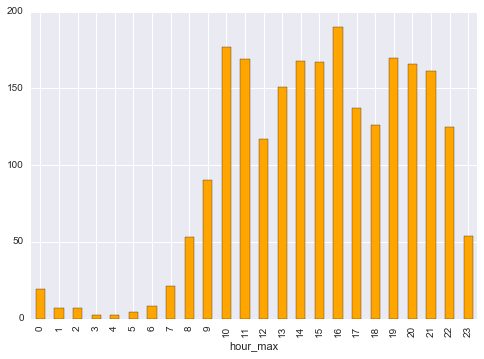

In [136]:
df_buy = df.ix[df.buy_type == 1]
count = df_buy.groupby(['hour_max']).size()
count.plot(kind='bar', color='orange')

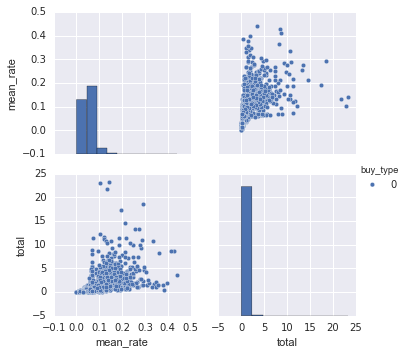

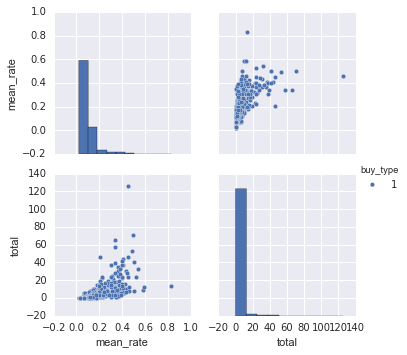

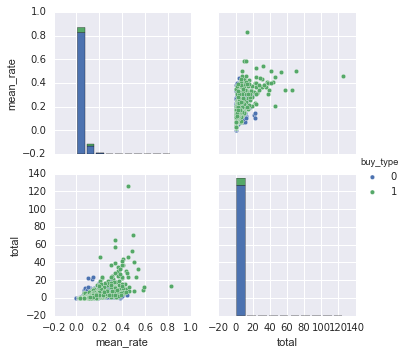

In [138]:
df_free = df.ix[df.buy_type == 0]
df_buy = df.ix[df.buy_type == 1]

for df_info in [df_free, df_buy, df]:
    sns.pairplot(df_info[['mean_rate', 'total', 'buy_type']],
                 vars=['mean_rate', 'total'], hue='buy_type')

In [147]:
import pandas as pd
import re
import numpy as np

df = pd.read_csv('D:/luzheng/桌面/用户行为/基于点击流用户行为分析素材/page_rate_chuxi.csv')

def pay_pe(x):
    pe = re.compile(r'.*pay', re.I)
    if pe.match(x):
        pass
    else:
        return x

df['url'] = df['url'].apply(pay_pe)
df = df[(df.join_rate >= 0.5) & (df.all_count >= 100)]
df = df.replace('None', np.nan).dropna(subset=['url'], how="all")
df

,Unnamed: 0,url,join_rate,all_count
174,523,http://www.51talk.com/user/agent_reserver.php,0.610778,167
189,101,http://www.51talk.com/user/wll,0.578035,173
196,415,http://www.51talk.com/user/get_pass.php,0.566929,127
200,238,http://www.51talk.com/user/service_center,0.560284,141
206,283,http://www.51talk.com/user/account_info,0.541485,229
210,500,http://www.51talk.com/index/guide,0.535565,239
213,489,http://www.51talk.com,0.532410,1805
214,204,http://www.51talk.com/index/teachers,0.530769,130
215,180,http://www.51talk.com/user/avatar,0.530000,200
223,394,http://www.51talk.com/user/order,0.525597,293


In [145]:
import pandas as pd
import re
import numpy as np

df = pd.read_csv('D:/luzheng/桌面/用户行为/基于点击流用户行为分析素材/page_rate_fufei.csv')

def pay_pe(x):
    pe = re.compile(r'.*pay', re.I)
    if pe.match(x):
        pass
    else:
        return x

df['url'] = df['url'].apply(pay_pe)
df = df[(df.pay_rate >= 0.2) & (df.all_count >= 50)]
df = df.replace('None', np.nan).dropna(subset=['url'], how="all")
df.sort_values('pay_rate')

,Unnamed: 0,url,pay_rate,all_count
83,286,http://www.51talk.com/user/order,0.610619,113
84,133,http://www.51talk.com/user/update_pwd,0.512821,78
96,70,http://www.51talk.com/user/wll,0.493506,77
100,126,http://www.51talk.com/user/voucher,0.408451,71
101,374,http://www.51talk.com/user/agent_reserver.php,0.401274,157
104,33,http://admin.51talk.com/trial/index,0.384615,78
106,127,http://www.51talk.com/user/avatar,0.375000,88
108,204,http://www.51talk.com/user/account_info,0.336634,101
116,341,http://www.51talk.com/user/info,0.329268,246
117,87,http://admin.51talk.com/trial/reserve,0.329268,82
